# Predicting heart disease using maching learing

This notebook looks to using various Python-based machine learning and data science libraries in an attemt to build a machine learning model capable of predicting whether or not someone has heart disease on their medical attributes.

We are going to take the following approach :
1. Problem defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline  

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [2]:
df = pd.read_csv("data/heart-disease.csv")
df.shape #(rows, ccolumns)

(303, 14)

## Data Exploration (exploraity data analysis or EDA)

The goal here is to more about the data and become the subject matter expert on the dataset you're working with 

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Let's find out how many of each class there
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

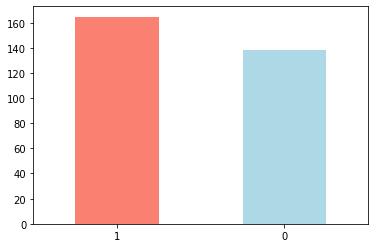

In [6]:
df['target'].value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.xticks(rotation=1);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Compare target column with sex column

pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


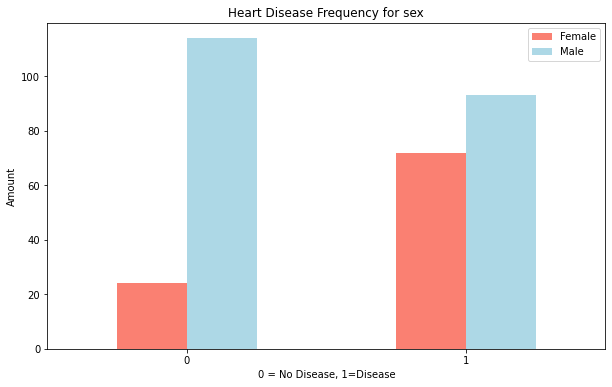

In [12]:
# Create a plot 
pd.crosstab(df['target'], df['sex']).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No Disease, 1=Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df['thalach'].value_counts() #so many different values

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

## Age vs Max Heart Rate for Heart Disease



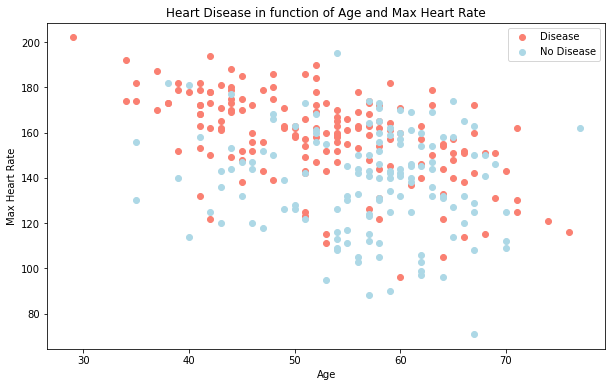

In [15]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

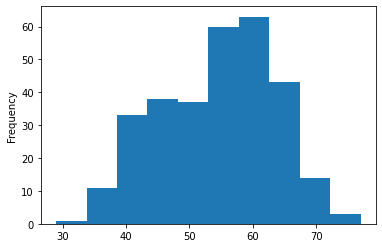

In [16]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

### Heart Disease Frequency per Chest pain time

In [17]:
pd.crosstab(df['cp'], df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


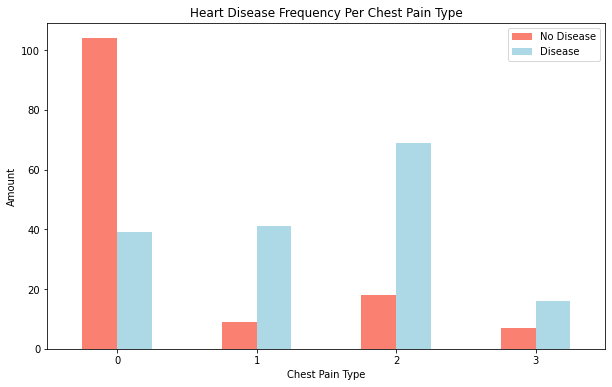

In [18]:
# Make the crosstab more visual
pd.crosstab(df['cp'], df['target']).plot(kind='bar', figsize=(10,6), color=['salmon','lightblue'])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [19]:
# Make a correation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


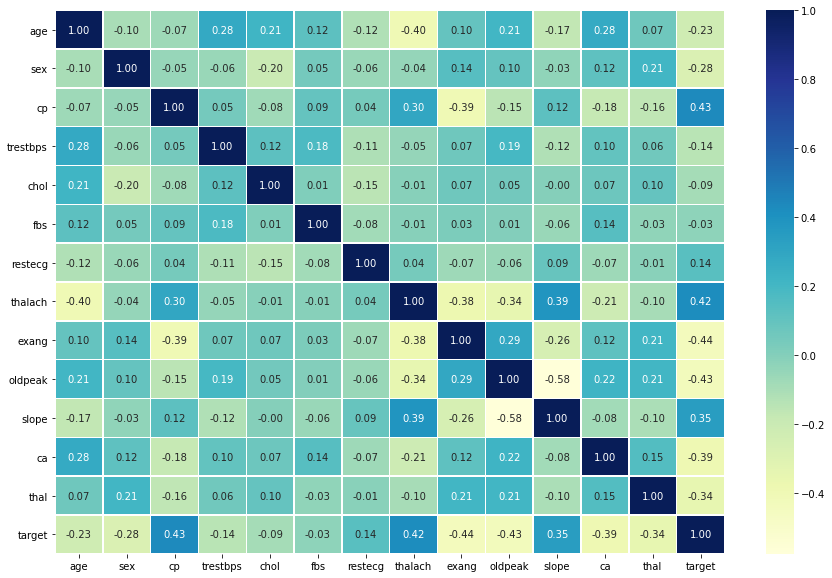

In [20]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                linewidths = 0.5,
                fmt = ".2f",
                cmap = "YlGnBu");

## 5. Modelling

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# Split data into X and y
X = df.drop("target", axis=1)
y = df["target"]

np.random.seed(42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# We're going to try 3 different machine learning models: 
# Logistic Regression 
# K-Nearest Neighbours Classifier
# RandomForesrClassifier

models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier()}

model_scores = {}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn Machine Learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """
    np.random.seed(42)
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

print(f"Score : {fit_and_score(models, X_train, X_test, y_train, y_test)}")

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Score : {'Logistic Regression': 0.8852459016393442, 'KNN': 0.6885245901639344, 'Random Forest': 0.8360655737704918}


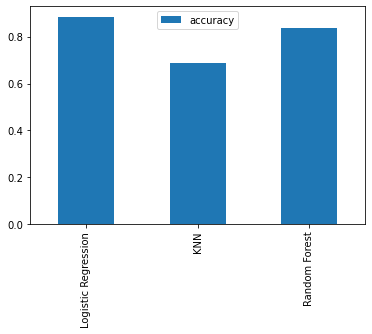

In [23]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first prediction aren't always what we should based our next steps off.
What should we do?

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter tuning

In [24]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbours
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [25]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [26]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on teh test data: 75.41%


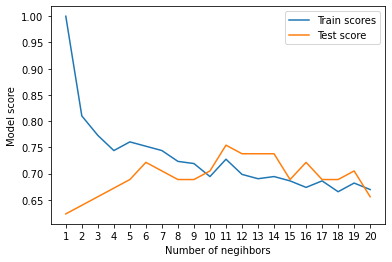

In [27]:
plt.plot(neighbors, train_scores, label="Train scores")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21, 1))
plt.xlabel("Number of negihbors")
plt.ylabel("Model score")
plt.legend()
print(f"Maximum KNN score on teh test data: {max(test_scores)*100:.2f}%")

# Hyperparameter tuning using RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

.. using RandomizedSearchCV

In [28]:
# Create a hyperparameter  grid for LogisticRegression

log_reg_grid = {'C': np.logspace(-4, 4, 20),
               "solver": ['liblinear']}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
          'max_depth':[None, 3, 5, 10],
          'min_samples_split': np.arange(2, 20, 2),
          'min_samples_leaf': np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our each models, let's tune them using RandomSearchCV...

In [29]:
# Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                           param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [30]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [31]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifire() ...

In [32]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter seacrch for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fir the random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [33]:
rs_rf.best_params_


{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [34]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8688524590163934

In [35]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hyperparameter tuning with GridSearchCV

Since out LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [36]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {
    'C': np.logspace(-4, 4, 30),
    'solver':['liblinear']
}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)
# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.5s finished


In [37]:
#Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [38]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparision and evaluate our trained model, we need to make predictions.


In [40]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

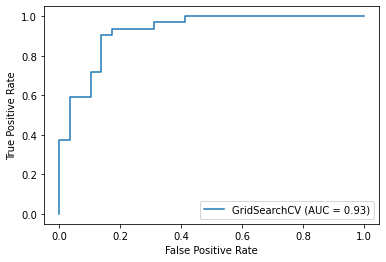

In [43]:
# Import ROC curve function from the sklearn metrics module
from sklearn.metrics import plot_roc_curve,confusion_matrix

plot_roc_curve(gs_log_reg, X_test, y_test);

In [44]:
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


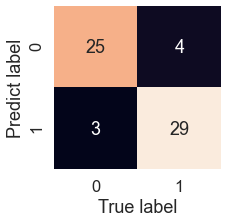

In [45]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predict label")
    
plot_conf_mat(y_test, y_preds)

 Now we've got a Roc curve, an AUC metric and a confusion matrix, lets get a classification report as well as cross-validated precision, recall and f1-score

In [46]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation matrics using cross-validation

We're going to calculate precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val-score()`

In [47]:
# Check best hyperparameters

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [48]:
# Create a new Classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')


In [49]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [50]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [51]:
# Coross-validated precision
cv_precision = cross_val_score(clf,
                                X,
                                y,
                                cv=5,
                                scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [52]:
# Coross-validated recall
cv_recall = cross_val_score(clf,
                                X,
                                y,
                                cv=5,
                                scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [54]:
# Coross-validated f1-score
cv_f1 = cross_val_score(clf,
                                X,
                                y,
                                cv=5,
                                scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

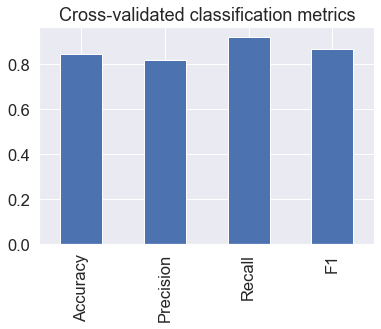

In [60]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                          'Precision': cv_precision,
                          'Recall': cv_recall,
                          'F1':cv_f1},
                         index=[0])

cv_metrics.T.plot(kind="bar", title="Cross-validated classification metrics", legend=False);

### Feature Importance

Feature importance is another as asking, "which features contributed most to the outcomes of the modeland how did they contribute?"

Finding Feautre importance is different for each machine learning model. One way to find feature importance is to search "(MODEL NAME) feature importance."

Let's find the feature importance for our LogisticRegression model...

In [62]:
# Fit an instance of LogisticRegression

clf = LogisticRegression(C = 0.20433597178569418,
                        solver = 'liblinear')

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [64]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [63]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044674,  0.66067031, -0.01156993, -0.00166375,
         0.04386101,  0.31275865,  0.02459362, -0.60413094, -0.56862789,
         0.45051632, -0.63609908, -0.67663375]])

In [65]:
# Match the coef's of features to columns 
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672830780218957,
 'sex': -0.8604467440762573,
 'cp': 0.6606703120090932,
 'trestbps': -0.011569932037408597,
 'chol': -0.00166374523064295,
 'fbs': 0.043861009724542044,
 'restecg': 0.3127586507840532,
 'thalach': 0.024593615555173243,
 'exang': -0.6041309439103262,
 'oldpeak': -0.5686278914396258,
 'slope': 0.4505163222528207,
 'ca': -0.6360990763634887,
 'thal': -0.6766337475895309}

In [66]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [70]:
list(clf.coef_[0])

[0.0031672830780218957,
 -0.8604467440762573,
 0.6606703120090932,
 -0.011569932037408597,
 -0.00166374523064295,
 0.043861009724542044,
 0.3127586507840532,
 0.024593615555173243,
 -0.6041309439103262,
 -0.5686278914396258,
 0.4505163222528207,
 -0.6360990763634887,
 -0.6766337475895309]

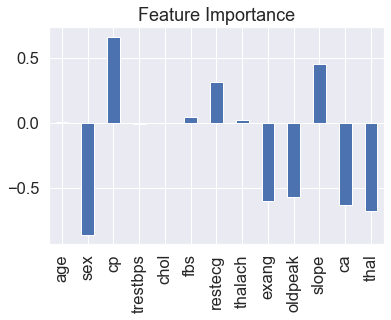

In [82]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot(kind='bar', title=("Feature Importance"), legend=False);

In [83]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [84]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experimentation

In [88]:
!pip3 install catboost

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=cade557c9c3491f2442fd4e868f676ffd71153a096f98424cf479c714a07b33b
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [90]:
!pip3 install xgboost

In [96]:
# CatBoost or XGBoost
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

new_models = {
    'CatBoost': CatBoostRegressor(),
    'xgboost': XGBRegressor()
}

new_models_score = {}

for name, model in new_models.items():
    model.fit(X_train, y_train)
    new_models_score[name] = model.score(X_test, y_test)

Learning rate set to 0.030319
0:	learn: 0.4909346	total: 153ms	remaining: 2m 33s
1:	learn: 0.4852498	total: 156ms	remaining: 1m 17s
2:	learn: 0.4792974	total: 157ms	remaining: 52.2s
3:	learn: 0.4742693	total: 159ms	remaining: 39.6s
4:	learn: 0.4682760	total: 161ms	remaining: 32s
5:	learn: 0.4629154	total: 162ms	remaining: 26.9s
6:	learn: 0.4576084	total: 164ms	remaining: 23.3s
7:	learn: 0.4532149	total: 166ms	remaining: 20.5s
8:	learn: 0.4485274	total: 167ms	remaining: 18.4s
9:	learn: 0.4447231	total: 168ms	remaining: 16.7s
10:	learn: 0.4402143	total: 169ms	remaining: 15.2s
11:	learn: 0.4364605	total: 170ms	remaining: 14s
12:	learn: 0.4325423	total: 171ms	remaining: 13s
13:	learn: 0.4283320	total: 172ms	remaining: 12.1s
14:	learn: 0.4241881	total: 174ms	remaining: 11.4s
15:	learn: 0.4204508	total: 175ms	remaining: 10.8s
16:	learn: 0.4156696	total: 176ms	remaining: 10.2s
17:	learn: 0.4118417	total: 177ms	remaining: 9.67s
18:	learn: 0.4084792	total: 178ms	remaining: 9.2s
19:	learn: 0.404

195:	learn: 0.2040591	total: 310ms	remaining: 1.27s
196:	learn: 0.2037399	total: 312ms	remaining: 1.27s
197:	learn: 0.2028982	total: 313ms	remaining: 1.27s
198:	learn: 0.2024835	total: 314ms	remaining: 1.26s
199:	learn: 0.2019742	total: 314ms	remaining: 1.26s
200:	learn: 0.2014836	total: 315ms	remaining: 1.25s
201:	learn: 0.2011221	total: 316ms	remaining: 1.25s
202:	learn: 0.2007856	total: 317ms	remaining: 1.24s
203:	learn: 0.2005717	total: 318ms	remaining: 1.24s
204:	learn: 0.1999885	total: 318ms	remaining: 1.23s
205:	learn: 0.1994217	total: 319ms	remaining: 1.23s
206:	learn: 0.1989454	total: 320ms	remaining: 1.23s
207:	learn: 0.1983662	total: 321ms	remaining: 1.22s
208:	learn: 0.1979474	total: 322ms	remaining: 1.22s
209:	learn: 0.1976924	total: 323ms	remaining: 1.21s
210:	learn: 0.1973069	total: 323ms	remaining: 1.21s
211:	learn: 0.1970066	total: 324ms	remaining: 1.21s
212:	learn: 0.1963589	total: 325ms	remaining: 1.2s
213:	learn: 0.1953698	total: 327ms	remaining: 1.2s
214:	learn: 0.

374:	learn: 0.1401735	total: 455ms	remaining: 759ms
375:	learn: 0.1398936	total: 456ms	remaining: 757ms
376:	learn: 0.1397460	total: 457ms	remaining: 756ms
377:	learn: 0.1394829	total: 458ms	remaining: 754ms
378:	learn: 0.1392607	total: 459ms	remaining: 752ms
379:	learn: 0.1388190	total: 460ms	remaining: 750ms
380:	learn: 0.1386062	total: 461ms	remaining: 749ms
381:	learn: 0.1385268	total: 462ms	remaining: 747ms
382:	learn: 0.1382699	total: 462ms	remaining: 745ms
383:	learn: 0.1378395	total: 463ms	remaining: 743ms
384:	learn: 0.1377344	total: 464ms	remaining: 741ms
385:	learn: 0.1375677	total: 465ms	remaining: 740ms
386:	learn: 0.1371678	total: 467ms	remaining: 739ms
387:	learn: 0.1368922	total: 468ms	remaining: 738ms
388:	learn: 0.1365747	total: 469ms	remaining: 736ms
389:	learn: 0.1363088	total: 469ms	remaining: 734ms
390:	learn: 0.1362150	total: 470ms	remaining: 733ms
391:	learn: 0.1360321	total: 471ms	remaining: 731ms
392:	learn: 0.1358476	total: 473ms	remaining: 731ms
393:	learn: 

561:	learn: 0.0987122	total: 605ms	remaining: 471ms
562:	learn: 0.0985143	total: 606ms	remaining: 470ms
563:	learn: 0.0983014	total: 607ms	remaining: 469ms
564:	learn: 0.0982519	total: 608ms	remaining: 468ms
565:	learn: 0.0980650	total: 609ms	remaining: 467ms
566:	learn: 0.0976782	total: 610ms	remaining: 466ms
567:	learn: 0.0972400	total: 611ms	remaining: 464ms
568:	learn: 0.0969362	total: 612ms	remaining: 463ms
569:	learn: 0.0967735	total: 613ms	remaining: 462ms
570:	learn: 0.0965898	total: 614ms	remaining: 461ms
571:	learn: 0.0965488	total: 614ms	remaining: 460ms
572:	learn: 0.0963841	total: 615ms	remaining: 459ms
573:	learn: 0.0961497	total: 616ms	remaining: 458ms
574:	learn: 0.0957423	total: 618ms	remaining: 456ms
575:	learn: 0.0954189	total: 619ms	remaining: 455ms
576:	learn: 0.0953492	total: 620ms	remaining: 454ms
577:	learn: 0.0951874	total: 621ms	remaining: 453ms
578:	learn: 0.0949907	total: 622ms	remaining: 452ms
579:	learn: 0.0948339	total: 623ms	remaining: 451ms
580:	learn: 

784:	learn: 0.0640337	total: 879ms	remaining: 241ms
785:	learn: 0.0638918	total: 882ms	remaining: 240ms
786:	learn: 0.0638130	total: 883ms	remaining: 239ms
787:	learn: 0.0635545	total: 890ms	remaining: 239ms
788:	learn: 0.0633762	total: 895ms	remaining: 239ms
789:	learn: 0.0632013	total: 897ms	remaining: 239ms
790:	learn: 0.0631567	total: 900ms	remaining: 238ms
791:	learn: 0.0630950	total: 902ms	remaining: 237ms
792:	learn: 0.0629953	total: 904ms	remaining: 236ms
793:	learn: 0.0629307	total: 905ms	remaining: 235ms
794:	learn: 0.0628719	total: 907ms	remaining: 234ms
795:	learn: 0.0626543	total: 910ms	remaining: 233ms
796:	learn: 0.0625011	total: 912ms	remaining: 232ms
797:	learn: 0.0624183	total: 913ms	remaining: 231ms
798:	learn: 0.0623382	total: 914ms	remaining: 230ms
799:	learn: 0.0622512	total: 916ms	remaining: 229ms
800:	learn: 0.0621419	total: 918ms	remaining: 228ms
801:	learn: 0.0620122	total: 920ms	remaining: 227ms
802:	learn: 0.0618186	total: 921ms	remaining: 226ms
803:	learn: 

967:	learn: 0.0476600	total: 1.14s	remaining: 37.7ms
968:	learn: 0.0474998	total: 1.14s	remaining: 36.6ms
969:	learn: 0.0474039	total: 1.14s	remaining: 35.4ms
970:	learn: 0.0474003	total: 1.14s	remaining: 34.2ms
971:	learn: 0.0472939	total: 1.15s	remaining: 33ms
972:	learn: 0.0472135	total: 1.15s	remaining: 31.8ms
973:	learn: 0.0471395	total: 1.15s	remaining: 30.7ms
974:	learn: 0.0470229	total: 1.15s	remaining: 29.5ms
975:	learn: 0.0469550	total: 1.15s	remaining: 28.3ms
976:	learn: 0.0468480	total: 1.15s	remaining: 27.1ms
977:	learn: 0.0467330	total: 1.15s	remaining: 25.9ms
978:	learn: 0.0466098	total: 1.16s	remaining: 24.8ms
979:	learn: 0.0465780	total: 1.16s	remaining: 23.6ms
980:	learn: 0.0464704	total: 1.16s	remaining: 22.4ms
981:	learn: 0.0463756	total: 1.16s	remaining: 21.2ms
982:	learn: 0.0463030	total: 1.16s	remaining: 20ms
983:	learn: 0.0462869	total: 1.16s	remaining: 18.9ms
984:	learn: 0.0461745	total: 1.16s	remaining: 17.7ms
985:	learn: 0.0460758	total: 1.16s	remaining: 16.5

{'CatBoost': 0.5196253240662461, 'xgboost': 0.47178018648170816}

In [97]:
new_models_score

{'CatBoost': 0.5196253240662461, 'xgboost': 0.47178018648170816}